In [195]:
import pandas as pd
import seaborn as sns

In [196]:
#importing data
data_1 = pd.read_csv('Sales_April_2019.csv')
data_2 = pd.read_csv('Sales_August_2019.csv')
data_3 = pd.read_csv('Sales_December_2019.csv')
data_4 = pd.read_csv('Sales_February_2019.csv')
data_5 = pd.read_csv('Sales_January_2019.csv')
data_6 = pd.read_csv('Sales_July_2019.csv')
data_7 = pd.read_csv('Sales_June_2019.csv')
data_8 = pd.read_csv('Sales_March_2019.csv')
data_9 = pd.read_csv('Sales_May_2019.csv')
data_10 = pd.read_csv('Sales_November_2019.csv')
data_11 = pd.read_csv('Sales_October_2019.csv')
data_12 = pd.read_csv('Sales_September_2019.csv')

data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_12,data_12],axis=0)
data.size

1068942

In [197]:
#errase Na
data = data.dropna()
data.size

1065804

In [198]:
#split time
date = data['Order Date'].str.split(' ', expand=True)
#split addres
city = data['Purchase Address'].str.split(', ', expand=True)


In [199]:
city =city.rename({1:'City'},axis=1)
date = date.rename({0: 'Date', 1:'Time'},axis=1)
date

,Date,Time
0,04/19/19,08:46
2,04/07/19,22:30
3,04/12/19,14:38
4,04/12/19,14:38
5,04/30/19,09:27
...,...,...
11681,09/17/19,20:56
11682,09/01/19,16:00
11683,09/23/19,07:39
11684,09/19/19,17:30


In [200]:
data_f = pd.concat([data,date[['Date','Time']],city['City']],axis=1)

In [201]:
data_final = data_f.drop(['Order Date','Purchase Address'],axis=1)
data_final


,Order ID,Product,Quantity Ordered,Price Each,Date,Time,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19,08:46,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,22:30,Boston
3,176560,Google Phone,1,600,04/12/19,14:38,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19,14:38,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19,09:27,Los Angeles
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19,20:56,Los Angeles
11682,259354,iPhone,1,700,09/01/19,16:00,San Francisco
11683,259355,iPhone,1,700,09/23/19,07:39,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19,17:30,San Francisco


In [202]:
filter = data_final['Quantity Ordered']!='Quantity Ordered'
data_filtered = data_final[filter]

In [203]:
data_filtered['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [204]:
data_filtered['Price Each'] = pd.to_numeric(data_filtered['Price Each'])
data_filtered['Quantity Ordered'] = pd.to_numeric(data_filtered['Quantity Ordered'])
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])


C:\Users\PC\AppData\Local\Temp\ipykernel_6348\430184813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Price Each'] = pd.to_numeric(data_filtered['Price Each'])
C:\Users\PC\AppData\Local\Temp\ipykernel_6348\430184813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Quantity Ordered'] = pd.to_numeric(data_filtered['Quantity Ordered'])
C:\Users\PC\AppData\Local\Temp\ipykernel_6348\430184813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [205]:
data_filtered['month'] = pd.DatetimeIndex(data_filtered['Date']).month
data_filtered


C:\Users\PC\AppData\Local\Temp\ipykernel_6348\555293775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = pd.DatetimeIndex(data_filtered['Date']).month


,Order ID,Product,Quantity Ordered,Price Each,Date,Time,City,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,08:46,Dallas,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,22:30,Boston,4
3,176560,Google Phone,1,600.00,2019-04-12,14:38,Los Angeles,4
4,176560,Wired Headphones,1,11.99,2019-04-12,14:38,Los Angeles,4
5,176561,Wired Headphones,1,11.99,2019-04-30,09:27,Los Angeles,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17,20:56,Los Angeles,9
11682,259354,iPhone,1,700.00,2019-09-01,16:00,San Francisco,9
11683,259355,iPhone,1,700.00,2019-09-23,07:39,San Francisco,9
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19,17:30,San Francisco,9


In [206]:
data_filtered['Total'] = data_filtered['Price Each'] * data_filtered['Quantity Ordered']

C:\Users\PC\AppData\Local\Temp\ipykernel_6348\1125589803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Total'] = data_filtered['Price Each'] * data_filtered['Quantity Ordered']


In [207]:
data_filtered

,Order ID,Product,Quantity Ordered,Price Each,Date,Time,City,month,Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,08:46,Dallas,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,22:30,Boston,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12,14:38,Los Angeles,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12,14:38,Los Angeles,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30,09:27,Los Angeles,4,11.99
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17,20:56,Los Angeles,9,8.97
11682,259354,iPhone,1,700.00,2019-09-01,16:00,San Francisco,9,700.00
11683,259355,iPhone,1,700.00,2019-09-23,07:39,San Francisco,9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19,17:30,San Francisco,9,379.99


In [208]:
question_1 = data_filtered.groupby('month').sum()
question_1

,Quantity Ordered,Price Each,Total
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,26206,4167887.44,4193023.52


<AxesSubplot:xlabel='month', ylabel='Total'>

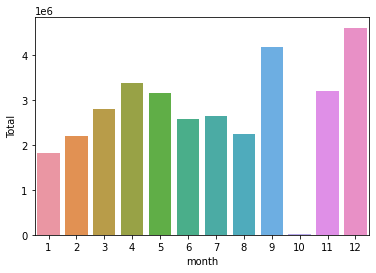

In [209]:
sns.barplot(x=question_1.index , y=question_1['Total'])